In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
# !ls "/content/drive/My Drive/NLP-Project"

In [ ]:
# !pip install stanza

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## VAERS 2020 Data

In [ ]:
data_2020 = pd.read_csv("/content/drive/My Drive/NLP-Project/2020VAERSDATA.csv", encoding='latin1')
data_2020_sym = pd.read_csv('/content/drive/My Drive/NLP-Project/2020VAERSSYMPTOMS.csv', encoding='latin1')
data_2020_vax = pd.read_csv('/content/drive/My Drive/NLP-Project/2020VAERSVAX.csv', encoding='latin1')

# data_2020 = pd.read_csv("/content/2020VAERSDATA.csv", encoding='latin1', error_bad_lines=False)
# data_2020_sym = pd.read_csv("/content/2020VAERSSYMPTOMS.csv", encoding='latin1')
# data_2020_vax = pd.read_csv("/content/2020VAERSVAX.csv", encoding='latin1')


In [ ]:
data_2020.shape, data_2020_sym.shape, data_2020_vax.shape

In [ ]:
data_2020.info()


### As the number of null records for 'Text' is very neglible. Hence, we can drop it.

In [ ]:
data_2020['SYMPTOM_TEXT'].isna().sum()

In [ ]:
data_2020_vax.info()

In [ ]:
len(data_2020_vax['VAX_NAME'].unique())

## VAERS 2021 Data

In [ ]:
data_2021 = pd.read_csv("/content/drive/My Drive/NLP-Project/2021VAERSDATA.csv", encoding='latin1')
data_2021_sym = pd.read_csv('/content/drive/My Drive/NLP-Project/2021VAERSSYMPTOMS.csv', encoding='latin1')
data_2021_vax = pd.read_csv('/content/drive/My Drive/NLP-Project/2021VAERSVAX.csv', encoding='latin1')


# data_2021 = pd.read_csv("/content/2021VAERSDATA.csv", encoding='latin1', error_bad_lines = False)
# data_2021_sym = pd.read_csv('/content/2021VAERSSYMPTOMS.csv', encoding='latin1')
# data_2021_vax = pd.read_csv('/content/2021VAERSVAX.csv', encoding='latin1')

In [ ]:
data_2021.shape, data_2021_sym.shape, data_2021_vax.shape

In [ ]:
data_2021.info()

In [ ]:
data_2021['SYMPTOM_TEXT'].isna().sum()

In [ ]:
data_2021_vax.info()

In [ ]:
len(data_2021_vax['VAX_NAME'].unique())

## VAERS 2022 Data

In [ ]:
data_2022 = pd.read_csv("/content/drive/My Drive/NLP-Project/2022VAERSDATA.csv", encoding='latin1')
data_2022_sym = pd.read_csv('/content/drive/My Drive/NLP-Project/2022VAERSSYMPTOMS.csv', encoding='latin1')
data_2022_vax = pd.read_csv('/content/drive/My Drive/NLP-Project/2022VAERSVAX.csv', encoding='latin1')


# data_2022 = pd.read_csv("/content/2022VAERSDATA.csv", encoding='latin1',error_bad_lines=False)
# data_2022_sym = pd.read_csv('/content/2022VAERSSYMPTOMS.csv', encoding='latin1')
# data_2022_vax = pd.read_csv('/content/2022VAERSVAX.csv', encoding='latin1')


In [ ]:
data_2022.shape, data_2022_sym.shape, data_2022_vax.shape

In [ ]:
data_2022.info()

In [ ]:
data_2022['SYMPTOM_TEXT'].isna().sum()

In [ ]:
data_2022_vax.info()

In [ ]:
len(data_2022_vax['VAX_NAME'].unique())

In [ ]:
(data_2022.merge(data_2022_vax, on='VAERS_ID')).shape, data_2022.shape

# VAERS 2023 Data

In [ ]:
data_2023 = pd.read_csv("/content/drive/My Drive/NLP-Project/2023VAERSDATA.csv", encoding='latin1')
data_2023_sym = pd.read_csv('/content/drive/My Drive/NLP-Project/2023VAERSSYMPTOMS.csv', encoding='latin1')
data_2023_vax = pd.read_csv('/content/drive/My Drive/NLP-Project/2023VAERSVAX.csv', encoding='latin1')

# data_2023 = pd.read_csv("/content/2023VAERSDATA.csv", encoding='latin1')
# data_2023_sym = pd.read_csv('/content/2023VAERSSYMPTOMS.csv', encoding='latin1')
# data_2023_vax = pd.read_csv('/content/2023VAERSVAX.csv', encoding='latin1')


In [ ]:
data_2023.shape, data_2023_sym.shape, data_2023_vax.shape

In [ ]:
data_2023.info()

In [ ]:
data_2023['SYMPTOM_TEXT'].isna().sum()

In [ ]:
data_2022_vax.info()

In [ ]:
merged_data_2023 = data_2023_vax.merge(data_2023, on='VAERS_ID', how='left')
merged_data_2022 = data_2022_vax.merge(data_2022, on='VAERS_ID', how='left')
merged_data_2021 = data_2021_vax.merge(data_2021, on='VAERS_ID', how='left')
merged_data_2020 = data_2020_vax.merge(data_2020, on='VAERS_ID', how='left')

In [ ]:
merged_data_2023.shape, merged_data_2022.shape, merged_data_2021.shape, merged_data_2020.shape

In [ ]:
merged_table = pd.concat([merged_data_2022, merged_data_2021, merged_data_2020], ignore_index=True)

In [ ]:
merged_table.shape

In [ ]:
merged_table = merged_table[['VAERS_ID',  'SYMPTOM_TEXT', 'VAX_NAME',]]

In [ ]:
merged_standard_sym = pd.concat([data_2022_sym, data_2021_sym, data_2020_sym], ignore_index=True)

In [ ]:
len(merged_table['VAX_NAME'].unique())

In [ ]:
merged_table.info()

In [ ]:
print(merged_table['SYMPTOM_TEXT'].isna().sum())

In [ ]:
merged_table.dropna(subset=['SYMPTOM_TEXT'], inplace=True)

In [ ]:
value_counts = merged_table['VAX_NAME'].value_counts()
count = value_counts[value_counts > 5000]
per = (value_counts / value_counts.sum()) * 100
percount_2 = per[per >= 5]
percount_1 = (per[per < 5]).sum()
plot_1 = pd.DataFrame({'Vaccine':['PFIZER-BIONTECH','Morderna','JANSSEN', 'other'], 'percentages':[percount_2[0],percount_2[1],percount_2[2],percount_1]})
print(plot_1)

In [ ]:
plt.pie(plot_1['percentages'], labels=plot_1['Vaccine'], autopct='%1.1f%%', startangle=140, colors=['blue', 'orange', 'green', 'red'])
plt.title("No. of Records for each vaccines")
plt.show()

As, COVID vaccines and Zoster has enough number of records. The processing will done the particular dataset.

In [ ]:
covid_data = merged_table[merged_table["VAX_NAME"] == 'COVID19 (COVID19 (PFIZER-BIONTECH))'].head(25)

In [ ]:
covid_data.shape

In [ ]:
df = covid_data.merge(merged_standard_sym, on='VAERS_ID', how='left')

In [ ]:
temp = df[df['VAX_NAME'] == 'COVID19 (COVID19 (PFIZER-BIONTECH))']
temp = temp.fillna('NA')
lst = []
for i,j in temp.iterrows():
  if j['SYMPTOM1'] != 'NA':
    lst.append(j['SYMPTOM1'])
  if j['SYMPTOM2'] != 'NA':
    lst.append(j['SYMPTOM2'])
  if j['SYMPTOM3'] != 'NA':
    lst.append(j['SYMPTOM3'])
  if j['SYMPTOM4'] != 'NA':
    lst.append(j['SYMPTOM4'])
  if j['SYMPTOM5'] != 'NA':
    lst.append(j['SYMPTOM5'])
print(len(lst))

In [ ]:
from collections import Counter
word_frequency = Counter(lst)
frequency_dict = dict(word_frequency)

print(frequency_dict)
tem = pd.DataFrame(frequency_dict.items(), columns=['Symptoms', 'Frequency'])

In [ ]:
lst2 = []
for i, j in frequency_dict.items():
  lst2.append(i)
print(lst2)

In [ ]:
len(lst2)

In [ ]:
import pandas as pd

In [ ]:
data_ext = pd.read_csv('/content/sample_data/symptoms_data_extracted.csv')

In [ ]:
data_ = pd.read_csv('/content/sample_data/symptoms_output.csv')

In [ ]:
data_ = data_.merge(data_ext, on='VAERS_ID', how='left')

In [ ]:
data_.rename(columns={'Symptoms_x': 'Symptoms_actual', 'Symptoms_y':'Symptoms_extracted'}, inplace=True)

In [ ]:
final = data_.iloc[:15]

In [ ]:
# lst1 = i2b2f1.Symptoms.tolist()

In [ ]:
# !pip install cohere
# !pip install tiktoken
# !pip install openai==0.28

In [ ]:
data_.head(2).values

array([[1996876,
        "['Dysmenorrhoea', 'Heavy menstrual bleeding', 'Menstruation irregular']",
        "['bad cramping', 'dysmenorrhoea', 'menstruation irregular  nonserious  onset', 'irregular menstrual cycle', 'extremely heavy bad cramping', 'heavy menstrual bleeding', 'menstruation irregular']"],
       [1996877,
        "['Heavy menstrual bleeding', 'Oligomenorrhoea', 'SARS-CoV-2 test negative']",
        "['heavy menstrual bleeding']"]], dtype=object)

In [ ]:
lst, lst1 =[], []
for _, j in data_.iterrows():
  lst.append(len(j['Symptoms_actual']))
  lst1.append(len(j['Symptoms_extracted']))

In [ ]:
actualLength = max(lst)
extractedLength = max(lst1)
minactualLength = min(lst)
minextractedLength = min(lst1)
print(actualLength, extractedLength)
print(minactualLength, minextractedLength)

2702 3405
7 2


In [ ]:
import matplotlib.pyplot as plt

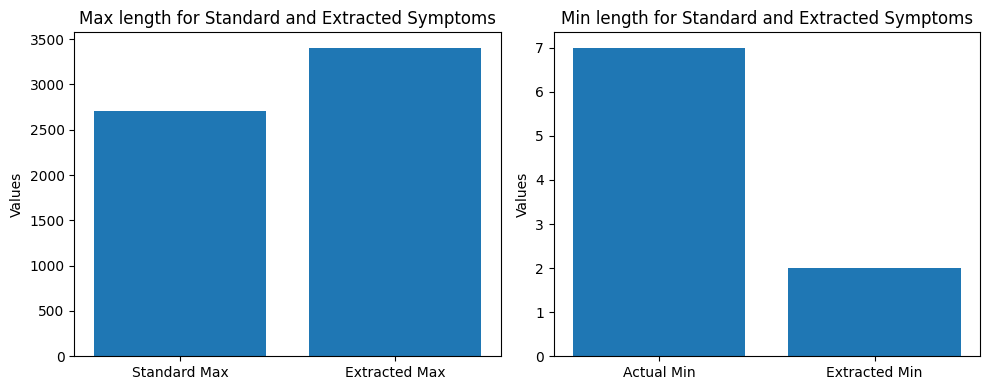

In [ ]:
# Calculate max and min values
actualLength = max(lst)
extractedLength = max(lst1)
minActualLength = min(lst)
minExtractedLength = min(lst1)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Creating bar plots
ax[0].bar(['Standard Max', 'Extracted Max'], [actualLength, extractedLength])
ax[1].bar(['Actual Min', 'Extracted Min'], [minActualLength, minExtractedLength])

# Adding title and labels
ax[0].set_title('Max length for Standard and Extracted Symptoms')
ax[1].set_title('Min length for Standard and Extracted Symptoms')
ax[0].set_ylabel('Values')
ax[1].set_ylabel('Values')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
import openai
print(openai.VERSION)

0.28.0


In [ ]:
openai.organization = 'your organization key'
openai.api_key = 'your_api_key'

In [ ]:
for _ , j in final.iterrows():
  print(j['Symptoms_actual'])
  break

['Dysmenorrhoea', 'Heavy menstrual bleeding', 'Menstruation irregular']


In [ ]:

final

,VAERS_ID,Symptoms_actual,Symptoms_extracted
0,1996876,"['Dysmenorrhoea', 'Heavy menstrual bleeding', ...","['bad cramping', 'dysmenorrhoea', 'menstruatio..."
1,1996877,"['Heavy menstrual bleeding', 'Oligomenorrhoea'...",['heavy menstrual bleeding']
2,1996878,"['Chills', 'Fatigue', 'Immunisation', 'Pain']","['side effects', 'achy', 'fatigue', 'pain', 't..."
3,1996879,"['Diarrhoea', 'SARS-CoV-2 test']",['activated immune system viral complications'...
4,1996880,"['Fatigue', 'Immunisation', 'Lymphadenopathy',...","['prediabetes', 'nose running', 'sore arm jab ..."
5,1996881,"['Biopsy', 'Biopsy skin', 'Drug eruption', 'Ra...","['lichenoid drug eruption', 'depression', 'tor..."
6,1996882,['Pyrexia'],"['fever', 'patient pain', 'patient s pain', 'p..."
7,1996883,"['Fatigue', 'Headache', 'Vaccination site pain']","['fatigue', 'vaccination site pain', 'headache']"
8,1996884,"['Illness', 'Vomiting']",['vomiting']
9,1996885,['Abdominal pain upper'],"['abdominal pain upper nonserious onset', 's..."


In [ ]:
final_results = pd.DataFrame(columns=['VAERS_ID', 'Generated_Response'])
# , 'Symptoms_actual', 'Symptoms_extracted',

In [ ]:
# for _ , j in final.iterrows():
#    prompt = f"Link the following symptoms to their corresponding or relevant standard symptoms by having format as a dic of Symptoms_extracted and Symptoms_actual:\n\nSymptoms: {j['Symptoms_extracted']}\n\nStandard Symptoms: {j['Symptoms_actual']}\n\n"
#    response = openai.ChatCompletion.create(model='gpt-3.5-turbo',messages=[{"role": "system", "content": "You are a helpful assistant that links Symptoms_extracted to corresponding or relevant standard symptoms."},{"role": "user", "content": prompt}])
#    linked_information = response['choices'][0]['message']['content']
#    final_results = final_results.append({
#         'VAERS_ID': j['VAERS_ID'],
#         # 'Symptoms_actual': j['Symptoms_actual'],
#         # 'Symptoms_extracted': j['Symptoms_extracted'],
#         'Generated_Response': [linked_information]
#     }, ignore_index=True)


In [ ]:
for _ , j in final.iterrows():
   prompt = f"Predict Standard Symptoms for Symptoms_extracted with context of Standard Symptoms and store into list:\n\nSymptoms: {j['Symptoms_extracted']}\n\nStandard Symptoms: {j['Symptoms_actual']}\n\n"
   response = openai.ChatCompletion.create(model='gpt-3.5-turbo',messages=[{"role": "system", "content": "You are a helpful assistant that links Symptoms_extracted to corresponding or relevant standard symptoms."},{"role": "user", "content": prompt}])
   linked_information = response['choices'][0]['message']['content']
   final_results = final_results.append({
        'VAERS_ID': j['VAERS_ID'],
        # 'Symptoms_actual': j['Symptoms_actual'],
        # 'Symptoms_extracted': j['Symptoms_extracted'],
        'Generated_Response': [linked_information]
    }, ignore_index=True)

<ipython-input-34-1bb7fdcce259>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_results = final_results.append({
<ipython-input-34-1bb7fdcce259>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_results = final_results.append({
<ipython-input-34-1bb7fdcce259>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_results = final_results.append({
<ipython-input-34-1bb7fdcce259>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_results = final_results.append({
<ipython-input-34-1bb7fdcce259>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

In [ ]:
final_results['Generated_Response'].values

array([list(["Predicted Standard Symptoms: ['Dysmenorrhoea', 'Dysmenorrhoea', 'Menstruation irregular', 'Menstruation irregular', 'Dysmenorrhoea', 'Heavy menstrual bleeding', 'Menstruation irregular']"]),
       list(["Predicted Standard Symptoms: ['Heavy menstrual bleeding', 'Oligomenorrhoea']"]),
       list(["Predicted Standard Symptoms: ['Fatigue', 'Pain', 'Chills']"]),
       list(["Predicted Standard Symptoms for Symptoms_extracted:\n\nPredicted Standard Symptoms: ['Diarrhoea', 'Thyroid disorder', 'Mononucleosis', 'Activated immune system viral complications']"]),
       list(["Standard Symptoms: ['Fatigue', 'Immunisation', 'Lymphadenopathy', 'Rhinorrhoea', 'Vaccination site pain']\n\nPredicted Standard Symptoms for Symptoms_extracted: \n\n['Fatigue', 'Rhinorrhoea', 'Lymphadenopathy', 'Vaccination site pain']"]),
       list(["Predicted Standard Symptoms for Symptoms_extracted:\n\n['Drug eruption', 'Rash']"]),
       list(["Predicted Standard Symptoms: ['Pyrexia', 'Pain']"]),
   

In [ ]:
final_results.to_csv('final2.csv')

In [ ]:
o1 = pd.read_csv('/content/final1.csv')
o2 = pd.read_csv('/content/final2.csv')

In [ ]:
o1 = pd.concat([o1, o2], ignore_index=True)

In [ ]:
o1

,Unnamed: 0,VAERS_ID,Generated_Response
0,0,1996891,"[""Predicted Standard Symptoms: ['Fatigue', 'Pa..."
1,1,1996892,"[""Predicted Standard Symptoms: ['Headache', 'F..."
2,2,1996893,"[""Predicted Standard Symptoms for Symptoms_ext..."
3,3,1996894,"[""Predicted Standard Symptoms: ['Fever', 'Musc..."
4,4,1996896,"[""Predicted Standard Symptoms: ['Lymphadenopat..."
5,5,1996897,"[""Predicted Standard Symptoms:\n\n['Feeling ab..."
6,6,1996898,"[""Predicted Standard Symptoms:\n- 'Urinary Tra..."
7,7,1996899,"[""Predicted Standard Symptoms: ['Headache', 'D..."
8,8,1996900,"[""Predicted standard symptoms for Symptoms_ext..."
9,9,1996901,"[""Predicted Standard Symptoms: ['Rash', 'Urtic..."


In [ ]:
f1 = data_.iloc[:30]

In [ ]:
o1 = f1.merge(o1, on='VAERS_ID', how='left')

In [ ]:
o1.to_csv('finaloutput.csv')

In [ ]:
import re

In [ ]:
for i, j in o1.iterrows():
   symptoms_str = ast.literal_eval(j['Generated_Response'])
  #  symptoms_str = symptoms_str[0]

   # Use ast.literal_eval to safely evaluate the string as a list
  #  symptoms_list = ast.literal_eval(symptoms_str)

   print(symptoms_str)

["Predicted Standard Symptoms: ['Dysmenorrhoea', 'Dysmenorrhoea', 'Menstruation irregular', 'Menstruation irregular', 'Dysmenorrhoea', 'Heavy menstrual bleeding', 'Menstruation irregular']"]
["Predicted Standard Symptoms: ['Heavy menstrual bleeding', 'Oligomenorrhoea']"]
["Predicted Standard Symptoms: ['Fatigue', 'Pain', 'Chills']"]
["Predicted Standard Symptoms for Symptoms_extracted:\n\nPredicted Standard Symptoms: ['Diarrhoea', 'Thyroid disorder', 'Mononucleosis', 'Activated immune system viral complications']"]
["Standard Symptoms: ['Fatigue', 'Immunisation', 'Lymphadenopathy', 'Rhinorrhoea', 'Vaccination site pain']\n\nPredicted Standard Symptoms for Symptoms_extracted: \n\n['Fatigue', 'Rhinorrhoea', 'Lymphadenopathy', 'Vaccination site pain']"]
["Predicted Standard Symptoms for Symptoms_extracted:\n\n['Drug eruption', 'Rash']"]
["Predicted Standard Symptoms: ['Pyrexia', 'Pain']"]
["Predicted Standard Symptoms: ['Fatigue', 'Vaccination site pain', 'Headache']"]
["Predicted Standar

In [ ]:
import ast
